In [1]:
import pandas as pd
import zipfile
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"

# Downloading the zip file
response = requests.get(url)
if response.status_code == 200:
    print("✅ Dataset downloaded successfully!")
else:
    print("❌ Failed to download dataset. Status code:", response.status_code)

# Extracting the CSV file from the zip
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("../data")  # saves files into your 'data' folder
    print("✅ Files extracted to data/ folder")


✅ Dataset downloaded successfully!
✅ Files extracted to data/ folder


In [3]:
df = pd.read_csv("/diabetic_data.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.replace("?", np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe(include='all').T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,99493,5,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,3197,9,[75-100),1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64


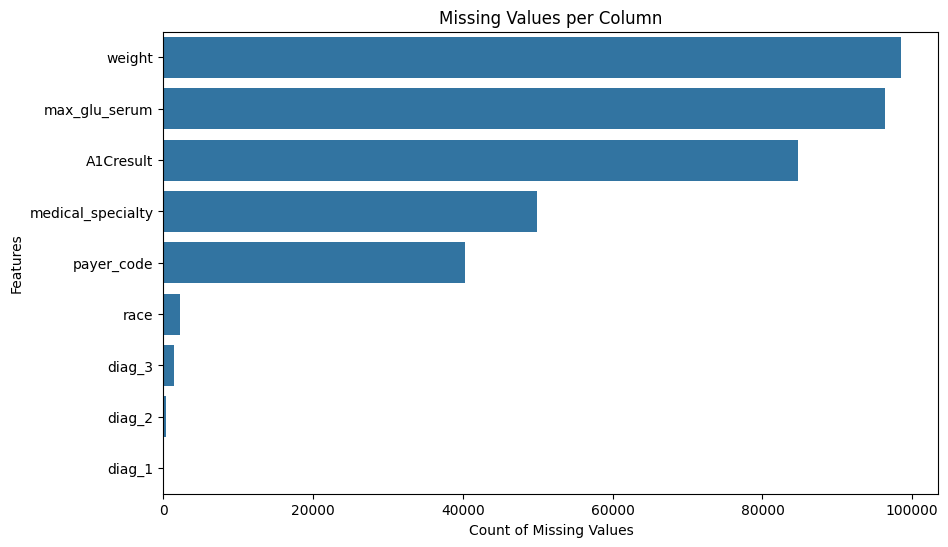

In [7]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Features")
plt.show()


In [8]:
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [9]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


In [10]:
df['race'].fillna('Unknown', inplace=True)
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].fillna('Unknown')
df[['max_glu_serum', 'A1Cresult']] = df[['max_glu_serum', 'A1Cresult']].fillna('None')
df.isnull().sum().sort_values(ascending=False).head(10)

/tmp/ipython-input-551359676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('Unknown', inplace=True)


,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


## EDA

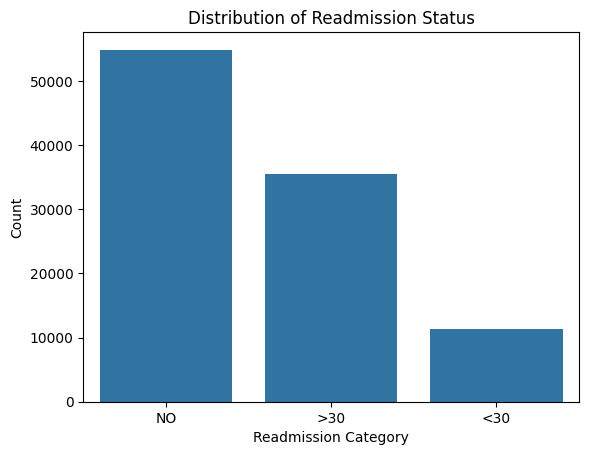

,proportion
readmitted,
NO,53.911916
>30,34.928169
<30,11.159916


In [11]:
sns.countplot(x='readmitted', data=df)
plt.title("Distribution of Readmission Status")
plt.xlabel("Readmission Category")
plt.ylabel("Count")
plt.show()

df['readmitted'].value_counts(normalize=True) * 100


In [12]:
print(df.columns.tolist())

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


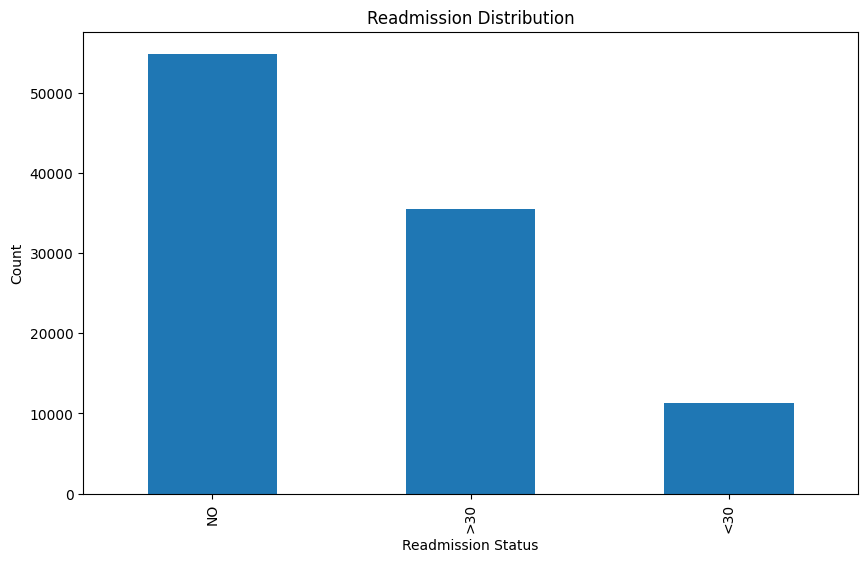

<Figure size 1200x600 with 0 Axes>

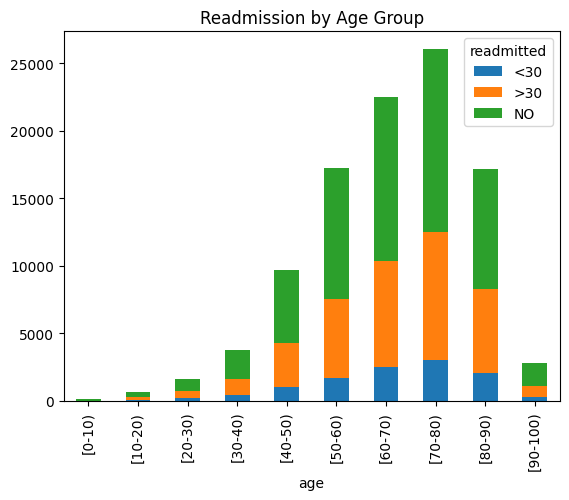

<Figure size 1200x600 with 0 Axes>

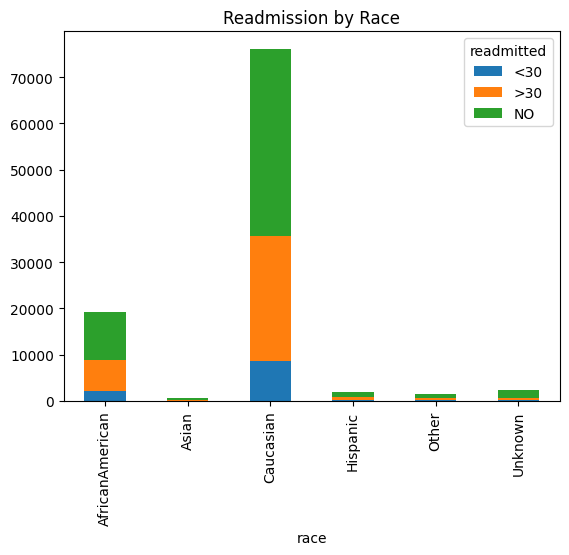

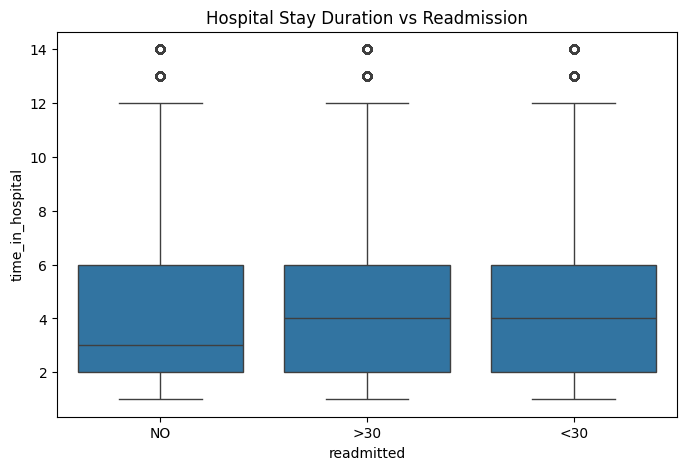

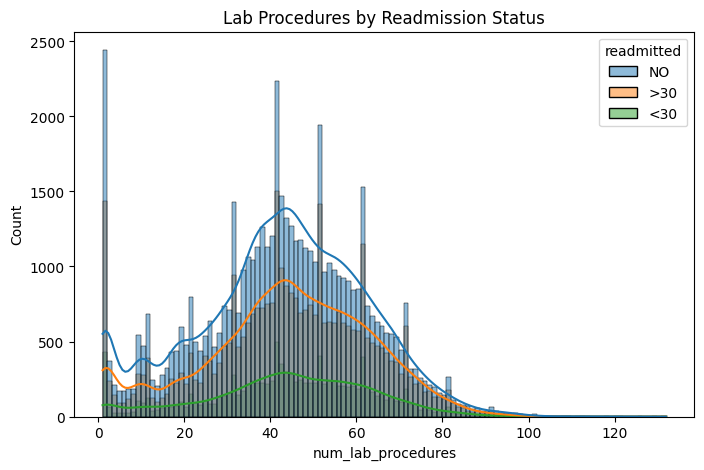

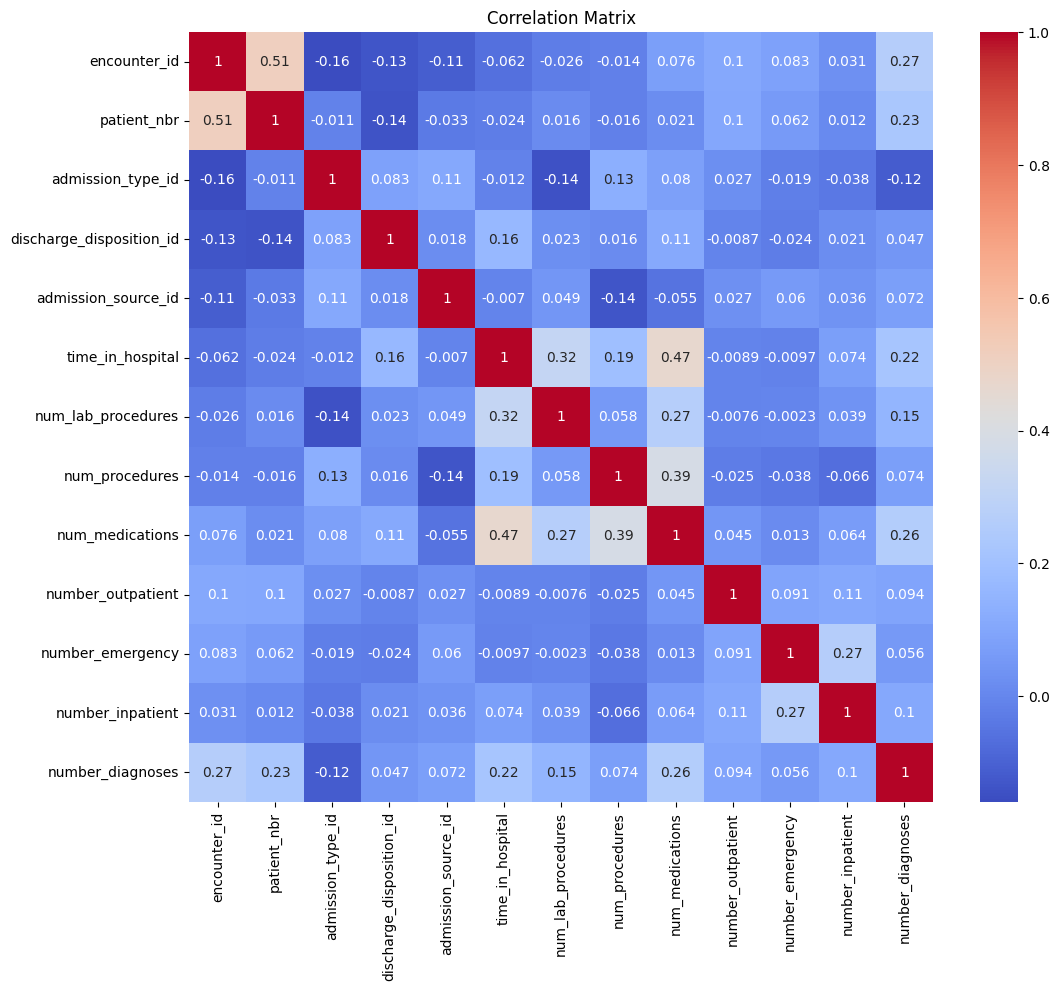

In [13]:
def perform_eda(df):
    """Comprehensive exploratory data analysis"""

    # Target variable distribution
    plt.figure(figsize=(10, 6))
    df['readmitted'].value_counts().plot(kind='bar')
    plt.title('Readmission Distribution')
    plt.xlabel('Readmission Status')
    plt.ylabel('Count')
    plt.show()

    # Age distribution vs readmission
    plt.figure(figsize=(12, 6))
    pd.crosstab(df['age'], df['readmitted']).plot(kind='bar', stacked=True)
    plt.title('Readmission by Age Group')
    plt.show()

    # # Medical specialty analysis
    # plt.figure(figsize=(15, 8))
    # df['medical_specialty'].value_counts().head(10).plot(kind='bar')
    # plt.title('Top 10 Medical Specialties')
    # plt.xticks(rotation=45)
    # plt.show()

    # Race distribution vs readmission
    plt.figure(figsize=(12, 6))
    pd.crosstab(df['race'], df['readmitted']).plot(kind='bar', stacked=True)
    plt.title('Readmission by Race')
    plt.show()

    # Time in hospital vs readmission
    plt.figure(figsize=(8,5))
    sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
    plt.title("Hospital Stay Duration vs Readmission")
    plt.show()

    # Number of lab procedures vs readmission
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x='num_lab_procedures', hue='readmitted', kde=True)
    plt.title("Lab Procedures by Readmission Status")
    plt.show()


    # Correlation analysis for numerical features
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Run EDA
perform_eda(df)

## Feature Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

# Copy original DataFrame
df_encoded = df.copy()

# -------------------------------
# STEP 1: Create binary target variable
# -------------------------------
df_encoded['readmitted_flag'] = df_encoded['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# -------------------------------
# STEP 2: Remove the target column BEFORE encoding
# -------------------------------
df_encoded.drop(columns=['readmitted'], inplace=True)

# -------------------------------
# STEP 3: Encode binary columns
# -------------------------------
binary_cols = ['change', 'diabetesMed']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# -------------------------------
# STEP 4: One-hot encode categorical columns
# -------------------------------
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 2339 entries, encounter_id to metformin-pioglitazone_Steady
dtypes: bool(2323), int64(16)
memory usage: 237.9 MB


In [15]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
df_encoded.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 2337 entries, admission_type_id to metformin-pioglitazone_Steady
dtypes: bool(2323), int64(14)
memory usage: 236.3 MB


In [17]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [18]:
# X_train.to_csv('../data/X_train_scaled.csv', index=False)
# X_test.to_csv('../data/X_test_scaled.csv', index=False)
# y_train.to_csv('../data/y_train.csv', index=False)
# y_test.to_csv('../data/y_test.csv', index=False)


In [19]:
# Recreate the binary target from original column
df['readmitted_flag'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# If you had one-hot encoded df before, ensure the target is reattached correctly
df_encoded = df_encoded.drop(columns=['readmitted_flag'], errors='ignore')
df_encoded['readmitted_flag'] = df['readmitted_flag']

# Split into features and target
X = df_encoded.drop(columns=['readmitted_flag'])
y = df_encoded['readmitted_flag']

# Confirm the target
print(y.value_counts())


readmitted_flag
0    90409
1    11357
Name: count, dtype: int64


## Model training

**Logistic Regression**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (not target!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [21]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability for class 1

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Accuracy: 0.8885
Precision: 0.5238
Recall: 0.0048
F1-score: 0.0096
ROC-AUC: 0.6507


In [23]:
y.value_counts(normalize=True)

,proportion
readmitted_flag,
0,0.888401
1,0.111599


In [24]:
log_reg_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_balanced.fit(X_train_scaled, y_train)
y_pred_balanced = log_reg_balanced.predict(X_test_scaled)

In [25]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_balanced))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_balanced.predict_proba(X_test_scaled)[:, 1]))


              precision    recall  f1-score   support

           0       0.92      0.65      0.76     18083
           1       0.16      0.55      0.25      2271

    accuracy                           0.64     20354
   macro avg       0.54      0.60      0.51     20354
weighted avg       0.84      0.64      0.70     20354

ROC-AUC: 0.637249107197929


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

rf.fit(X_res, y_res)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Train the model with class_weight='balanced'
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

# 2️⃣ Evaluate baseline (default threshold = 0.5)
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

print("=== Baseline Performance (Threshold = 0.5) ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# 3️⃣ Adjust threshold to improve recall
threshold = 0.3  # Try a lower threshold
y_pred_adj = (y_proba > threshold).astype(int)

print(f"\n=== Adjusted Threshold Performance (Threshold = {threshold}) ===")
print(classification_report(y_test, y_pred_adj))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# 4️⃣ Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [ ]:
# src/feature_engineering.py
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

class FeatureEngineer:
    def __init__(self):
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')

    def preprocess_features(self, df):
        """Handle missing values and encode categorical variables"""

        # Handle missing values
        df = df.replace('?', np.nan)

        # Drop columns with too many missing values
        missing_threshold = 0.4
        missing_ratios = df.isnull().sum() / len(df)
        cols_to_drop = missing_ratios[missing_ratios > missing_threshold].index
        df = df.drop(columns=cols_to_drop)

        # Encode categorical variables
        categorical_cols = df.select_dtypes(include=['object']).columns

        for col in categorical_cols:
            if col not in ['readmitted']:  # Don't encode target yet
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col].astype(str))
                self.label_encoders[col] = le

        # Create target variable (binary: readmitted vs not)
        df['readmission_binary'] = (df['readmitted'] != 'NO').astype(int)

        return df

    def create_features(self, df):
        """Create new features from existing data"""

        # Number of medications
        medication_cols = [col for col in df.columns if 'med' in col.lower()]
        df['num_medications'] = df[medication_cols].sum(axis=1)

        # Number of diagnoses
        diagnosis_cols = [col for col in df.columns if 'diag' in col.lower()]
        df['num_diagnoses'] = df[diagnosis_cols].notna().sum(axis=1)

        # Age as numerical (extract midpoint)
        age_mapping = {
            '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
            '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
            '[80-90)': 85, '[90-100)': 95
        }
        df['age_numeric'] = df['age'].map(age_mapping)

        return df

**XGboost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate class weight to handle imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize the model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='auc'
)

# Train
xgb.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_scaled)
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()


**LightGBM**

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    class_weight='balanced',
    random_state=42
)
lgb.fit(X_train_scaled, y_train)


In [ ]:
y_pred_lgb = lgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lgb))

**Catboost**

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    class_weights=[1, len(y_train[y_train==0]) / len(y_train[y_train==1])],
    verbose=0
)
cat.fit(X_train_scaled, y_train)
y_pred_cat = cat.predict(X_test_scaled)
print(classification_report(y_test, y_pred_cat))


## Optimizing the Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # optional but okay to keep
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])


In [ ]:
# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

param_grid = {
    'rf__n_estimators': [200, 400, 600],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring='f1_macro',  # balances performance on both classes
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


In [ ]:
# Evaluate the best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
